In [588]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats 
import psycopg2 # needed to get database exception errors when uploading dataframe


In [589]:
all_death_workforce = pd.read_excel('Heart data/All deaths at working age.xlsx')

In [590]:
all_death_workforce.head()

,country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,NaN
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,NaN,NaN,NaN,NaN,NaN
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,NaN
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,NaN
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0


In [591]:
all_death_workforce.rename(columns={'2013': 'death_work_13', '2014': 'death_work_14','2015': 'death_work_15', 
                                      '2016':'death_work_16', '2017': 'death_work_17', '2018': 'death_work_18','2019': 'death_work_19', 
                                      '2020': 'death_work_20', '2021': 'death_work_21', '2022': 'death_work_22'}, inplace=True)

In [592]:
all_death_workforce.head()

,country,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,NaN
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,NaN,NaN,NaN,NaN,NaN
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,NaN
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,NaN
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0


In [593]:
all_death_workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        37 non-null     object 
 1   death_work_13  36 non-null     float64
 2   death_work_14  36 non-null     float64
 3   death_work_15  36 non-null     float64
 4   death_work_16  36 non-null     float64
 5   death_work_17  36 non-null     float64
 6   death_work_18  36 non-null     float64
 7   death_work_19  34 non-null     float64
 8   death_work_20  34 non-null     float64
 9   death_work_21  34 non-null     float64
 10  death_work_22  10 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.3+ KB


In [594]:
# Separate numeric and non-numeric columns
numeric_cols = all_death_workforce.select_dtypes(include=[np.number]).columns
non_numeric_cols = all_death_workforce.select_dtypes(exclude=[np.number]).columns


In [595]:
all_death_workforce[numeric_cols] = all_death_workforce[numeric_cols].fillna(all_death_workforce[numeric_cols].mean())

In [596]:
# Round all numeric columns to one decimal place
all_death_workforce = all_death_workforce.round(1)

In [597]:
all_death_workforce

,country,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,277.5
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,694.3,667.1,665.3,699.3,277.5
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,277.5
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,277.5
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0
5,Denmark,93.0,104.0,118.0,136.0,119.0,77.0,110.0,119.0,116.0,277.5
6,Germany,1585.0,1554.0,1584.0,1457.0,1435.0,1432.0,1359.0,1388.0,1365.0,277.5
7,Estonia,62.0,66.0,36.0,54.0,39.0,19.0,31.0,28.0,32.0,277.5
8,Ireland,138.0,148.0,108.0,100.0,90.0,97.0,89.0,90.0,114.0,277.5
9,Greece,263.0,255.0,250.0,238.0,225.0,235.0,221.0,209.0,222.0,277.5


In [598]:
# Round the numbers to 2 decimal places and remove trailing zeros
#all_death_workforce.astype(str).applymap(lambda x: x.rstrip('0').rstrip('.') if '.' in x else x)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

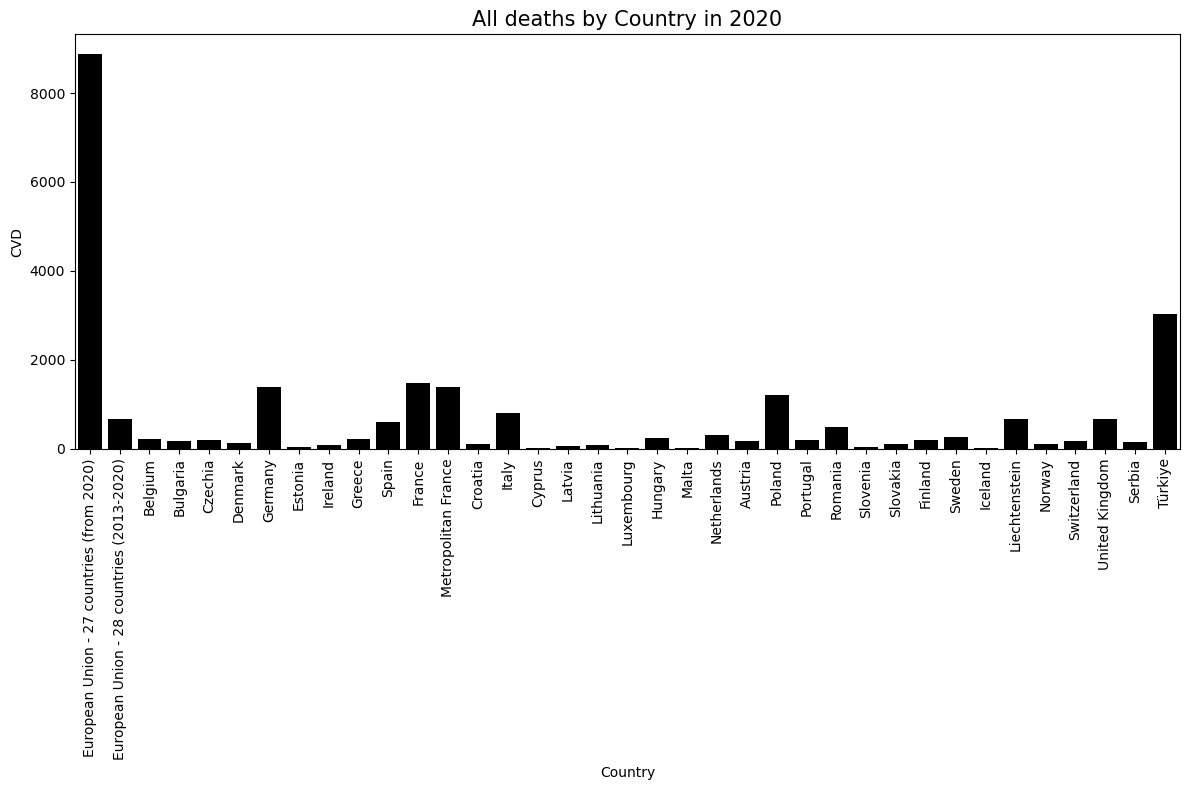

In [599]:
plt.figure(figsize=(12,8))

death_countries = sns.barplot(data= all_death_workforce, x= 'country', y= 'death_work_20', color= 'black')

#mean_death = all_death_workforce['death_work_20'].mean

#death_countries.axhline(mean_death, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

death_countries.set_title('All deaths by Country in 2020', fontsize=15)
death_countries.set_xlabel('Country', fontsize= 10)
death_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [600]:
cvd_work = pd.read_excel('Heart data/CVD due to work.xlsx')

In [601]:
cvd_work.rename(columns={'TIME': 'country', '2020':'cvd_20'}, inplace=True)

In [602]:
cvd_work.head()

,country,cvd_20
0,European Union - 27 countries (from 2020),0.5
1,European Union - 28 countries (2013-2020),NaN
2,Euro area - 19 countries (2015-2022),0.2
3,Belgium,0.3
4,Bulgaria,1.4


In [603]:
cvd_work_sorted = cvd_work.sort_values(by='cvd_20')

In [604]:
# Separate numeric and non-numeric columns
numeric_cols = cvd_work_sorted.select_dtypes(include=[np.number]).columns
non_numeric_cols = cvd_work_sorted.select_dtypes(exclude=[np.number]).columns

#fill null value
cvd_work_sorted[numeric_cols] = cvd_work_sorted[numeric_cols].fillna(cvd_work_sorted[numeric_cols].mean())


# Round all numeric columns to one decimal place
cvd_work_sorted = cvd_work_sorted.round(1)


In [605]:
cvd_work_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 5 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  35 non-null     object 
 1   cvd_20   35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 840.0+ bytes


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

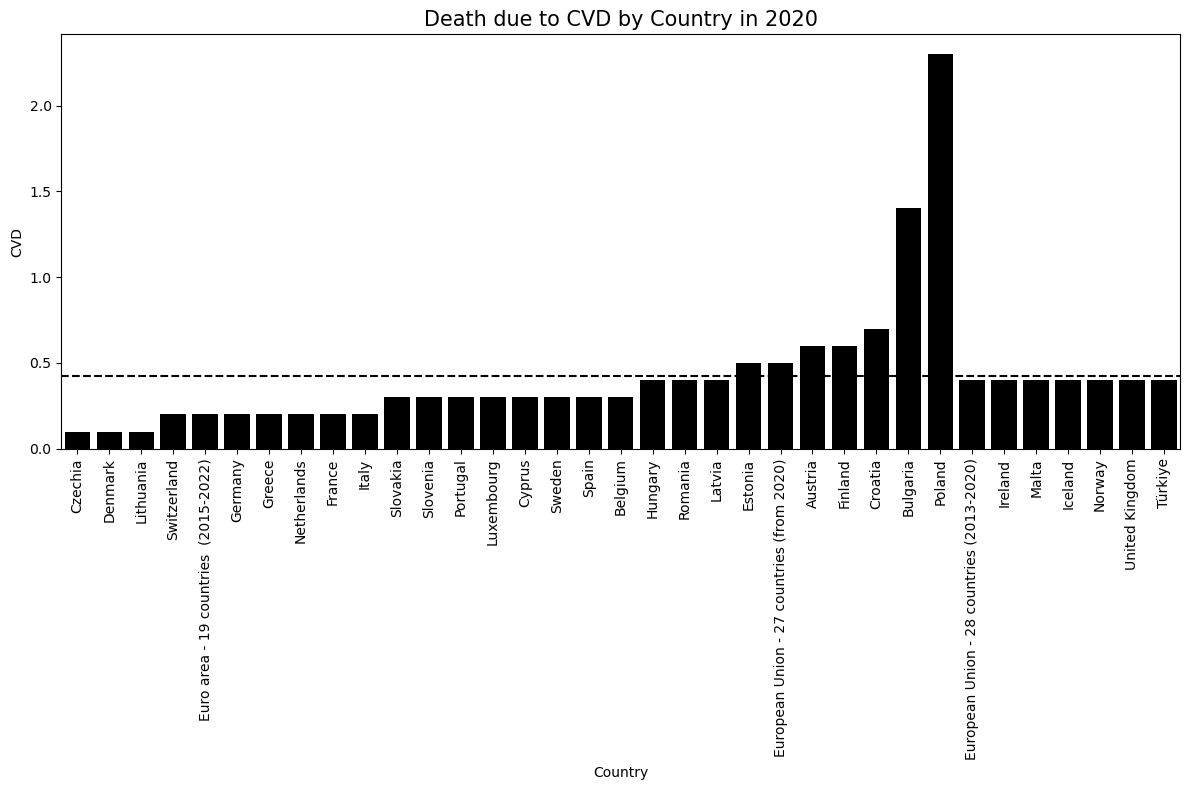

In [606]:
plt.figure(figsize=(12,8))

cvd_countries = sns.barplot(data= cvd_work_sorted, x= 'country', y= 'cvd_20', color= 'black')

mean_cvd = cvd_work['cvd_20'].mean() 

cvd_countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

cvd_countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
cvd_countries.set_xlabel('Country', fontsize= 10)
cvd_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [607]:
death_other_heart_diseases = pd.read_excel('Heart data/Death by other heart diseases.xlsx')

In [608]:
death_other_heart_diseases.rename(columns={'2012': 'other_12', '2013': 'other_13', '2014': 'other_14','2015': 'other_15', 
                                      '2016':'other_16', '2017': 'other_17', '2018': 'other_18','2019': 'other_19', 
                                      '2020': 'other_20', '2021': 'other_21'}, inplace=True)


In [609]:
death_other_heart_diseases.head()

,country,other_12,other_13,other_14,other_15,other_16,other_17,other_18,other_19,other_20,other_21
0,Belgium,18.64,18.46,16.66,16.07,16.88,17.33,11.33,11.45,11.38,11.87
1,Bulgaria,107.74,116.91,127.89,115.11,135.01,133.17,135.75,124.77,124.88,132.79
2,Czechia,25.86,21.04,21.70,23.47,25.71,27.75,26.48,25.67,25.55,27.93
3,Denmark,12.37,12.14,13.83,12.18,13.22,14.58,13.78,11.05,9.42,10.10
4,Germany,18.03,17.76,17.65,19.09,16.88,15.29,15.21,12.98,12.39,13.05


In [610]:
death_other_heart_diseases.isnull().sum()

country     0
other_12    0
other_13    0
other_14    0
other_15    0
other_16    0
other_17    0
other_18    0
other_19    0
other_20    0
other_21    0
dtype: int64

In [611]:
expenses_healthcare = pd.read_excel('Heart data/Expenditure in healthcare.xlsx') 

In [612]:
expenses_healthcare.rename(columns={'TIME': 'country', '2012': 'exp_12', '2013': 'exp_13', '2014': 'exp_14','2015': 'exp_15', 
                                      '2016':'exp_16', '2017': 'exp_17', '2018': 'exp_18','2019': 'exp_19', 
                                      '2020': 'exp_20', '2021': 'exp_21', '2022': 'exp_22', '2023':'exp_23'}, inplace=True)

In [613]:
expenses_healthcare.head()

,country,exp_12,exp_13,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,European Union - 27 countries (from 2020),NaN,NaN,180885.50,186125.51,193175.30,208001.81,217206.33,227159.57,243002.47,255332.48,NaN,NaN
1,Euro area – 20 countries (from 2023),NaN,NaN,158678.69,163200.99,169471.14,183186.60,191992.27,201151.96,215198.64,225637.74,NaN,NaN
2,Euro area - 19 countries (2015-2022),NaN,NaN,158589.44,163103.02,169372.15,183084.66,191882.62,201033.40,215082.57,225512.79,NaN,NaN
3,Belgium,8460.02,8852.82,9338.09,10334.36,11289.13,11831.11,12477.06,11964.11,11244.63,11897.60,NaN,NaN
4,Bulgaria,2.75,3.32,3.58,4.39,3.34,3.59,4.26,5.32,110.15,196.77,283.48,NaN


In [614]:
# Separate numeric and non-numeric columns
numeric_cols = expenses_healthcare.select_dtypes(include=[np.number]).columns
non_numeric_cols = expenses_healthcare.select_dtypes(exclude=[np.number]).columns

#fill null value
expenses_healthcare[numeric_cols] = expenses_healthcare[numeric_cols].fillna(expenses_healthcare[numeric_cols].mean())


# Round all numeric columns to one decimal place
expenses_healthcare = expenses_healthcare.round(1)


In [615]:
expenses_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  41 non-null     object 
 1   exp_12   41 non-null     float64
 2   exp_13   41 non-null     float64
 3   exp_14   41 non-null     float64
 4   exp_15   41 non-null     float64
 5   exp_16   41 non-null     float64
 6   exp_17   41 non-null     float64
 7   exp_18   41 non-null     float64
 8   exp_19   41 non-null     float64
 9   exp_20   41 non-null     float64
 10  exp_21   41 non-null     float64
 11  exp_22   41 non-null     float64
 12  exp_23   41 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.3+ KB


In [616]:
death_ischaemic = pd.read_excel('Heart data/Death by ischaemic heart.xlsx')

In [617]:
death_ischaemic.rename(columns={'2012': 'isch_12', '2013': 'isch_13', '2014': 'isch_14','2015': 'isch_15', 
                                      '2016':'isch_16', '2017': 'isch_17', '2018': 'isch_18','2019': 'isch_19', 
                                      '2020': 'isch_20', '2021': 'isch_21'}, inplace=True)


In [618]:
death_ischaemic.head()

,country,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,isch_20,isch_21
0,Belgium,25.91,25.33,23.62,23.67,21.34,20.91,20.68,19.02,17.74,17.94
1,Bulgaria,82.84,76.19,79.70,77.36,76.47,78.32,77.16,76.88,90.63,95.52
2,Czechia,69.01,70.49,62.98,60.09,53.99,53.84,53.67,50.34,49.64,49.65
3,Denmark,23.70,22.11,21.45,20.68,20.51,19.22,18.47,18.84,18.28,17.79
4,Germany,37.94,36.78,34.62,35.42,33.65,32.54,32.06,30.24,30.88,30.71


In [619]:
death_ischaemic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  34 non-null     object 
 1   isch_12  34 non-null     float64
 2   isch_13  34 non-null     float64
 3   isch_14  34 non-null     float64
 4   isch_15  34 non-null     float64
 5   isch_16  34 non-null     float64
 6   isch_17  34 non-null     float64
 7   isch_18  34 non-null     float64
 8   isch_19  34 non-null     float64
 9   isch_20  34 non-null     float64
 10  isch_21  34 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.0+ KB


In [620]:
death_other_ischaemic = pd.read_excel('Heart data/Death by other ischaemic diseases.xlsx')

In [621]:
death_other_ischaemic.rename(columns={'2012': 'other_isch_12', '2013': 'other_isch_13', '2014': 'other_isch_14','2015': 'other_isch_15', 
                                      '2016':'other_isch_16', '2017': 'other_isch_17', '2018': 'other_isch_18','2019': 'other_isch_19', 
                                      '2020': 'other_isch_20', '2021': 'other_isch_21'}, inplace=True)


In [622]:
death_other_ischaemic.head()

,country,other_isch_12,other_isch_13,other_isch_14,other_isch_15,other_isch_16,other_isch_17,other_isch_18,other_isch_19,other_isch_20,other_isch_21
0,Belgium,6.32,6.38,6.15,6.75,5.64,5.55,6.16,5.83,5.33,5.60
1,Bulgaria,30.91,29.35,28.15,29.10,27.88,32.90,29.11,30.01,36.25,37.56
2,Czechia,37.85,42.16,39.32,38.37,34.01,34.10,35.99,33.38,32.71,32.68
3,Denmark,9.64,10.45,10.78,9.79,9.75,9.45,7.83,8.96,9.35,9.23
4,Germany,12.22,11.85,11.60,12.45,11.61,11.65,11.53,11.26,11.09,10.97


In [623]:
death_other_ischaemic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        34 non-null     object 
 1   other_isch_12  34 non-null     float64
 2   other_isch_13  34 non-null     float64
 3   other_isch_14  34 non-null     float64
 4   other_isch_15  34 non-null     float64
 5   other_isch_16  34 non-null     float64
 6   other_isch_17  34 non-null     float64
 7   other_isch_18  34 non-null     float64
 8   other_isch_19  34 non-null     float64
 9   other_isch_20  34 non-null     float64
 10  other_isch_21  34 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.0+ KB


In [624]:
all_heart = cvd_work.merge(death_ischaemic, on= 'country', how= 'outer').merge(death_other_ischaemic, on='country', how='outer').merge(death_other_heart_diseases, on='country', how='outer').merge(all_death_workforce, on='country', how='outer').merge(expenses_healthcare ,on='country' , how='outer')

In [625]:
all_heart.merge(all_death_workforce, on='country', how='outer').merge(cvd_work, on='country', how='outer')

,country,cvd_20_x,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,...,death_work_14_y,death_work_15_y,death_work_16_y,death_work_17_y,death_work_18_y,death_work_19_y,death_work_20_y,death_work_21_y,death_work_22_y,cvd_20_y
0,European Union - 27 countries (from 2020),0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,277.5,0.5
1,European Union - 28 countries (2013-2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11807.0,11742.0,11034.0,10822.0,694.3,667.1,665.3,699.3,277.5,NaN
2,Euro area - 19 countries (2015-2022),0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
3,Belgium,0.3,25.91,25.33,23.62,23.67,21.34,20.91,20.68,19.02,...,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,277.5,0.3
4,Bulgaria,1.4,82.84,76.19,79.70,77.36,76.47,78.32,77.16,76.88,...,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,277.5,1.4
5,Czechia,0.1,69.01,70.49,62.98,60.09,53.99,53.84,53.67,50.34,...,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0,0.1
6,Denmark,0.1,23.70,22.11,21.45,20.68,20.51,19.22,18.47,18.84,...,104.0,118.0,136.0,119.0,77.0,110.0,119.0,116.0,277.5,0.1
7,Germany,0.2,37.94,36.78,34.62,35.42,33.65,32.54,32.06,30.24,...,1554.0,1584.0,1457.0,1435.0,1432.0,1359.0,1388.0,1365.0,277.5,0.2
8,Estonia,0.5,87.73,79.97,78.97,65.57,69.73,67.39,62.05,46.95,...,66.0,36.0,54.0,39.0,19.0,31.0,28.0,32.0,277.5,0.5
9,Ireland,NaN,43.09,39.68,40.97,39.60,36.62,32.72,33.91,34.05,...,148.0,108.0,100.0,90.0,97.0,89.0,90.0,114.0,277.5,NaN


In [626]:
# Separate numeric and non-numeric columns
numeric_cols = all_heart.select_dtypes(include=[np.number]).columns
non_numeric_cols = all_heart.select_dtypes(exclude=[np.number]).columns

#fill null value
all_heart[numeric_cols] = all_heart[numeric_cols].fillna(all_heart[numeric_cols].mean())


# Round all numeric columns to one decimal place
all_heart = all_heart.round(1)


In [627]:
all_heart.shape

(43, 54)

In [628]:
all_heart.isnull().sum()

country          0
cvd_20           0
isch_12          0
isch_13          0
isch_14          0
isch_15          0
isch_16          0
isch_17          0
isch_18          0
isch_19          0
isch_20          0
isch_21          0
other_isch_12    0
other_isch_13    0
other_isch_14    0
other_isch_15    0
other_isch_16    0
other_isch_17    0
other_isch_18    0
other_isch_19    0
other_isch_20    0
other_isch_21    0
other_12         0
other_13         0
other_14         0
other_15         0
other_16         0
other_17         0
other_18         0
other_19         0
other_20         0
other_21         0
death_work_13    0
death_work_14    0
death_work_15    0
death_work_16    0
death_work_17    0
death_work_18    0
death_work_19    0
death_work_20    0
death_work_21    0
death_work_22    0
exp_12           0
exp_13           0
exp_14           0
exp_15           0
exp_16           0
exp_17           0
exp_18           0
exp_19           0
exp_20           0
exp_21           0
exp_22      

In [629]:
all_heart

,country,cvd_20,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,...,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,European Union - 27 countries (from 2020),0.5,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,180885.5,186125.5,193175.3,208001.8,217206.3,227159.6,243002.5,255332.5,5532.2,17684.0
1,European Union - 28 countries (2013-2020),0.4,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,20610.3,21378.7,22033.7,23605.9,24653.0,25819.6,26974.3,27524.1,5532.2,17684.0
2,Euro area - 19 countries (2015-2022),0.2,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,158589.4,163103.0,169372.2,183084.7,191882.6,201033.4,215082.6,225512.8,5532.2,17684.0
3,Belgium,0.3,25.9,25.3,23.6,23.7,21.3,20.9,20.7,19.0,...,9338.1,10334.4,11289.1,11831.1,12477.1,11964.1,11244.6,11897.6,5532.2,17684.0
4,Bulgaria,1.4,82.8,76.2,79.7,77.4,76.5,78.3,77.2,76.9,...,3.6,4.4,3.3,3.6,4.3,5.3,110.2,196.8,283.5,17684.0
5,Czechia,0.1,69.0,70.5,63.0,60.1,54.0,53.8,53.7,50.3,...,1403.3,1494.6,1592.2,1801.7,2085.4,2297.5,2539.5,2861.0,5532.2,17684.0
6,Denmark,0.1,23.7,22.1,21.4,20.7,20.5,19.2,18.5,18.8,...,5864.6,6035.7,6195.3,6364.0,6585.1,6703.0,6858.8,7162.5,7492.4,17684.0
7,Germany,0.2,37.9,36.8,34.6,35.4,33.6,32.5,32.1,30.2,...,52260.0,55557.0,58733.0,68311.0,73020.0,78264.0,85207.0,89508.0,5532.2,17684.0
8,Estonia,0.5,87.7,80.0,79.0,65.6,69.7,67.4,62.0,47.0,...,114.8,125.9,130.9,144.5,159.0,177.8,197.0,217.0,251.5,17684.0
9,Ireland,0.4,43.1,39.7,41.0,39.6,36.6,32.7,33.9,34.0,...,4061.0,4277.6,4527.3,4585.7,4907.8,5212.6,5783.4,6013.6,6403.2,17684.0


In [630]:
# Exclude non-numeric columns
numeric_df = all_heart.select_dtypes(include=[float, int])


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


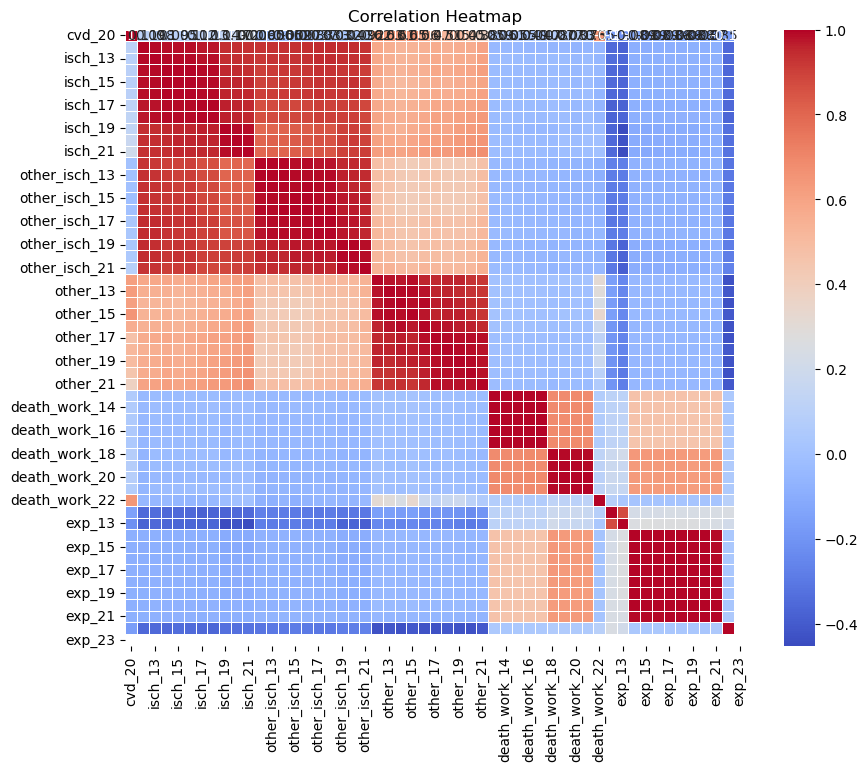

In [631]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

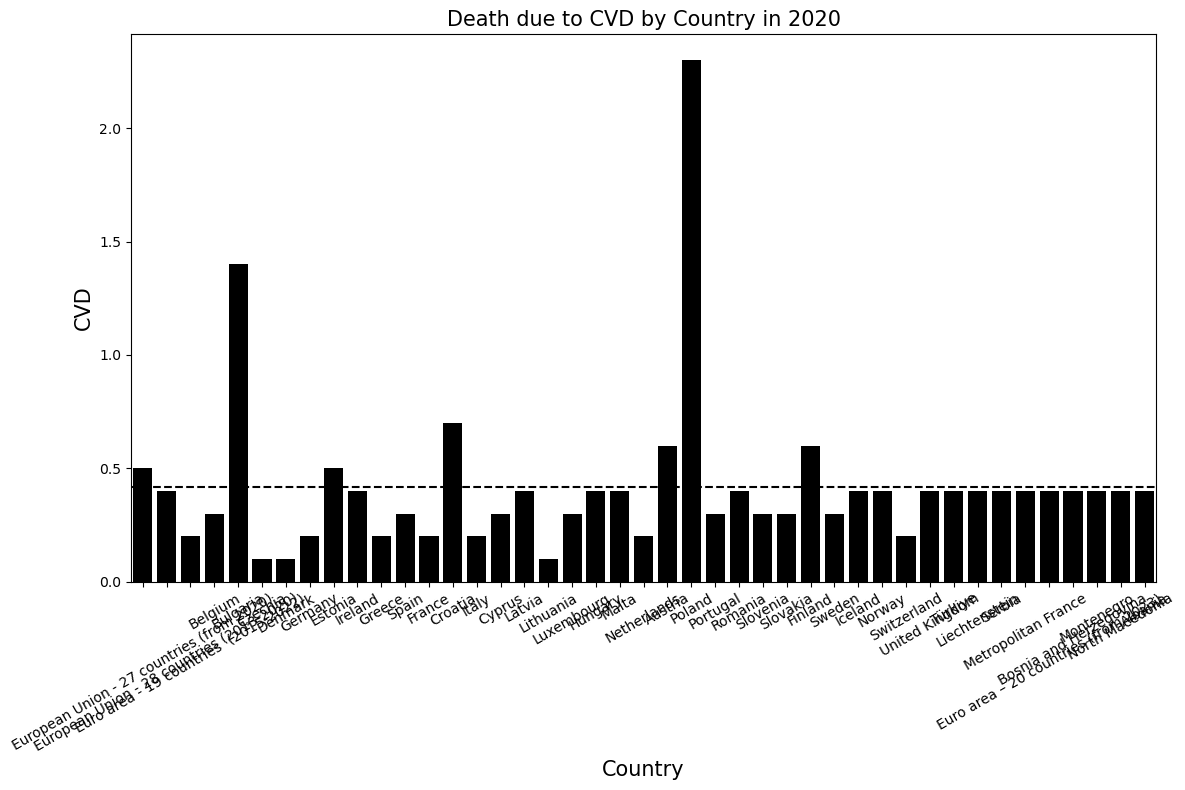

In [632]:
mean_cvd = all_heart['cvd_20'].mean()  

plt.figure(figsize=(12,8))
countries = sns.barplot(data= all_heart, x= 'country', y= 'cvd_20', color= 'black')


countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'CVD', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

In [633]:

wlb = pd.read_csv('Data/work_life_balance.csv', delimiter= ',')

In [634]:
wlb.columns = wlb.columns.str.replace( ' ', '_').str.lower()

remote_job = wlb['remote_jobs']
remote_job = remote_job.str.replace('%', '', regex=False)
remote_job = remote_job.astype('float')
wlb['remote_jobs'] = remote_job

overwork = wlb['overworked_population']
overwork = overwork.str.replace('%', '', regex=False)
overwork = overwork.astype('float')
wlb['overworked_population'] = overwork

multi_jobs = wlb['multiple_jobholders']
multi_jobs = multi_jobs.str.replace('%', '', regex=False)
multi_jobs = multi_jobs.astype('float')
wlb['multiple_jobholders'] = multi_jobs

vacation_taken = wlb['vacations_taken_(days)']
vacation_taken = vacation_taken.replace('-', '0', regex=False)
vacation_taken = vacation_taken.astype('float')
wlb['vacations_taken_(days)'] = vacation_taken

parental_leave = wlb['paid_parental_leave_(days)']
parental_leave = parental_leave.str.replace(',', '.', regex=False)
parental_leave = parental_leave.astype('float')
wlb['paid_parental_leave_(days)'] = parental_leave

inflation_1 = wlb['inflation']
inflation_1 = inflation_1.str.replace('%', '', regex=False)
inflation_1 = inflation_1.astype('float')
wlb['inflation'] = inflation_1

wlb.drop(['2021', '2022'], axis=1, inplace=True)

In [635]:
wlb

,city,country,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,Oslo,Norway,41.72,11.2,25,25.0,94.7,9.1,6.47,707.00,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,Bern,Switzerland,44.86,11.4,20,25.0,99.8,7.6,1.80,98.00,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1.19,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.00,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.00,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bangkok,Thailand,16.84,15.1,6,10.0,99.2,3.7,3.46,90.00,...,75.7,79.7,73.5,50.0,65.8,27.8,70.1,84.0,65.4,70.73
96,Sao Paulo,Brazil,25.65,11.8,10,30.0,79.6,4.7,16.39,181.00,...,62.5,50.0,79.5,55.5,75.8,17.4,76.9,88.0,61.9,66.57
97,Kuala Lumpur,Malaysia,30.70,17.1,8,12.0,94.9,1.1,2.56,98.00,...,66.7,74.3,57.0,70.5,59.5,47.2,62.2,84.8,59.7,66.02
98,Dubai,UAE,28.89,23.4,30,27.0,100.0,10.0,6.89,45.00,...,69.4,52.2,50.0,78.0,79.2,97.9,50.0,50.0,58.6,61.23


In [636]:
# Group by the 'Country' column and aggregate the 'City' column as a list
#wlb_1 = wlb.groupby('country')['city'].agg(list).reset_index()


In [646]:
wlb.columns

Index(['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [647]:
wlb_numeric_columns = ['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score']

In [648]:
for col in wlb_numeric_columns:
    wlb[col] = pd.to_numeric(wlb[col], errors='coerce')


In [649]:
wlb_1 = wlb.groupby('country').agg({'city':list, 'remote_jobs' : 'mean', 'overworked_population': 'mean',
       'minimum_vacations_offered_(days)' : 'mean', 'vacations_taken_(days)' : 'mean',
       'unemployment' :'mean', 'multiple_jobholders' : 'mean', 'inflation' : 'mean',
       'paid_parental_leave_(days)' : 'mean', 'covid_impact' : 'mean', 'covid_support' :'mean',
       'healthcare' :'mean', 'access_to_mental_healthcare' :'mean', 'inclusivity_&_tolerance' :'mean',
       'affordability' :'mean', 'happiness,_culture_&_leisure' : 'mean', 'city_safety' :'mean',
       'outdoor_spaces':'mean', 'air_quality' :'mean', 'wellness_and_fitness' :'mean', 'total_score' :'mean'
      }).reset_index()

In [650]:
wlb_1

,country,city,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,Argentina,[Buenos Aires],28.390000,8.800000,10.0,15.00000,86.300000,10.000000,107.410000,92.000000,...,65.200000,70.200000,83.900000,57.400000,74.300000,38.800000,82.500000,95.600000,60.600000,73.150000
1,Australia,"[Sydney, Melbourne]",38.790000,9.700000,20.0,14.00000,95.200000,6.400000,6.460000,140.000000,...,98.650000,67.400000,91.800000,74.400000,91.550000,74.900000,94.600000,97.900000,72.600000,93.400000
2,Austria,"[Graz, Vienna]",36.690000,12.500000,25.0,25.00000,84.850000,4.400000,6.570000,275.450000,...,93.600000,77.300000,94.200000,66.250000,86.550000,84.900000,87.900000,95.300000,69.900000,88.785000
3,Belgium,[Brussels],42.340000,12.900000,20.0,24.00000,87.800000,4.300000,6.530000,361.200000,...,94.400000,81.500000,93.100000,67.400000,77.300000,69.900000,80.200000,94.100000,68.400000,87.180000
4,Brazil,[Sao Paulo],25.650000,11.800000,10.0,30.00000,79.600000,4.700000,16.390000,181.000000,...,62.500000,50.000000,79.500000,55.500000,75.800000,17.400000,76.900000,88.000000,61.900000,66.570000
5,Canada,"[Ottawa, Vancouver, Toronto, Calgary]",37.810000,10.100000,10.0,16.00000,92.100000,6.025000,6.460000,364.000000,...,96.925000,92.400000,93.500000,72.300000,82.450000,78.725000,87.575000,98.875000,66.075000,92.060000
6,Denmark,[Copenhagen],41.420000,10.500000,25.0,28.00000,94.800000,7.600000,5.180000,364.000000,...,94.800000,77.600000,95.200000,65.300000,92.500000,95.700000,75.500000,95.100000,66.300000,96.210000
7,Finland,[Helsinki],38.920000,12.700000,25.0,30.00000,89.300000,6.300000,4.790000,1.190000,...,96.700000,73.000000,93.900000,65.000000,96.300000,94.900000,86.000000,97.000000,68.300000,99.240000
8,France,[Paris],37.740000,13.800000,25.0,27.00000,88.000000,5.100000,4.210000,490.000000,...,95.900000,79.300000,91.700000,61.300000,84.900000,61.200000,77.400000,93.100000,100.000000,89.730000
9,Germany,"[Stuttgart, Munich, Leipzig, Hamburg, Frankfur...",36.730000,11.644444,20.0,26.00000,90.611111,4.800000,6.260000,466.900000,...,94.477778,82.000000,94.411111,74.044444,85.966667,74.800000,84.055556,95.922222,70.877778,91.702222


In [651]:
wlb_1 = wlb_1.round(1)

In [652]:
wlb_1

,country,city,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,Argentina,[Buenos Aires],28.4,8.8,10.0,15.0,86.3,10.0,107.4,92.0,...,65.2,70.2,83.9,57.4,74.3,38.8,82.5,95.6,60.6,73.2
1,Australia,"[Sydney, Melbourne]",38.8,9.7,20.0,14.0,95.2,6.4,6.5,140.0,...,98.6,67.4,91.8,74.4,91.6,74.9,94.6,97.9,72.6,93.4
2,Austria,"[Graz, Vienna]",36.7,12.5,25.0,25.0,84.8,4.4,6.6,275.4,...,93.6,77.3,94.2,66.2,86.6,84.9,87.9,95.3,69.9,88.8
3,Belgium,[Brussels],42.3,12.9,20.0,24.0,87.8,4.3,6.5,361.2,...,94.4,81.5,93.1,67.4,77.3,69.9,80.2,94.1,68.4,87.2
4,Brazil,[Sao Paulo],25.6,11.8,10.0,30.0,79.6,4.7,16.4,181.0,...,62.5,50.0,79.5,55.5,75.8,17.4,76.9,88.0,61.9,66.6
5,Canada,"[Ottawa, Vancouver, Toronto, Calgary]",37.8,10.1,10.0,16.0,92.1,6.0,6.5,364.0,...,96.9,92.4,93.5,72.3,82.4,78.7,87.6,98.9,66.1,92.1
6,Denmark,[Copenhagen],41.4,10.5,25.0,28.0,94.8,7.6,5.2,364.0,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.2
7,Finland,[Helsinki],38.9,12.7,25.0,30.0,89.3,6.3,4.8,1.2,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.2
8,France,[Paris],37.7,13.8,25.0,27.0,88.0,5.1,4.2,490.0,...,95.9,79.3,91.7,61.3,84.9,61.2,77.4,93.1,100.0,89.7
9,Germany,"[Stuttgart, Munich, Leipzig, Hamburg, Frankfur...",36.7,11.6,20.0,26.0,90.6,4.8,6.3,466.9,...,94.5,82.0,94.4,74.0,86.0,74.8,84.1,95.9,70.9,91.7


In [653]:
wlb_heart_agg = pd.merge(wlb_1, all_heart, on= 'country', how='inner')

In [654]:
wlb_heart_agg['country'].value_counts()

country
Austria        1
Belgium        1
Denmark        1
Finland        1
France         1
Germany        1
Hungary        1
Ireland        1
Italy          1
Netherlands    1
Norway         1
Portugal       1
Spain          1
Sweden         1
Switzerland    1
Name: count, dtype: int64

In [655]:
wlb_heart_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           15 non-null     object 
 1   city                              15 non-null     object 
 2   remote_jobs                       15 non-null     float64
 3   overworked_population             15 non-null     float64
 4   minimum_vacations_offered_(days)  15 non-null     float64
 5   vacations_taken_(days)            15 non-null     float64
 6   unemployment                      15 non-null     float64
 7   multiple_jobholders               15 non-null     float64
 8   inflation                         15 non-null     float64
 9   paid_parental_leave_(days)        15 non-null     float64
 10  covid_impact                      15 non-null     float64
 11  covid_support                     15 non-null     float64
 12  healthcare

In [656]:
wlb_heart_agg

,country,city,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),...,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,Austria,"[Graz, Vienna]",36.7,12.5,25.0,25.0,84.8,4.4,6.6,275.4,...,5114.9,5302.1,5536.8,5700.3,5880.9,6070.4,6346.3,6472.4,6715.3,17684.0
1,Belgium,[Brussels],42.3,12.9,20.0,24.0,87.8,4.3,6.5,361.2,...,9338.1,10334.4,11289.1,11831.1,12477.1,11964.1,11244.6,11897.6,5532.2,17684.0
2,Denmark,[Copenhagen],41.4,10.5,25.0,28.0,94.8,7.6,5.2,364.0,...,5864.6,6035.7,6195.3,6364.0,6585.1,6703.0,6858.8,7162.5,7492.4,17684.0
3,Finland,[Helsinki],38.9,12.7,25.0,30.0,89.3,6.3,4.8,1.2,...,4129.1,3709.0,3722.3,3661.2,3633.1,3821.6,3961.0,4289.0,5532.2,17684.0
4,France,[Paris],37.7,13.8,25.0,27.0,88.0,5.1,4.2,490.0,...,37663.2,38437.2,39277.3,40406.4,41385.8,42734.5,46351.2,48894.0,5532.2,17684.0
5,Germany,"[Stuttgart, Munich, Leipzig, Hamburg, Frankfur...",36.7,11.6,20.0,26.0,90.6,4.8,6.3,466.9,...,52260.0,55557.0,58733.0,68311.0,73020.0,78264.0,85207.0,89508.0,5532.2,17684.0
6,Hungary,[Budapest],30.9,14.4,20.0,24.1,97.5,1.2,11.2,1.1,...,319.0,312.1,298.4,340.4,355.7,364.7,407.1,439.6,5532.2,17684.0
7,Ireland,[Dublin],38.7,12.7,20.0,21.0,92.6,2.7,5.0,182.0,...,4061.0,4277.6,4527.3,4585.7,4907.8,5212.6,5783.4,6013.6,6403.2,17684.0
8,Italy,[Milan],35.0,13.2,20.0,21.0,91.4,1.4,5.8,336.7,...,15228.0,15190.0,15478.0,16039.0,16298.0,16102.0,16138.0,16611.0,17480.0,17684.0
9,Netherlands,[Amsterdam],41.6,8.6,20.0,24.0,95.4,8.1,8.6,114.8,...,19838.0,18676.0,18885.0,19892.0,20990.0,22982.0,25842.0,26594.0,5532.2,17684.0


In [657]:
wlb_heart_agg['country'].value_counts()

country
Austria        1
Belgium        1
Denmark        1
Finland        1
France         1
Germany        1
Hungary        1
Ireland        1
Italy          1
Netherlands    1
Norway         1
Portugal       1
Spain          1
Sweden         1
Switzerland    1
Name: count, dtype: int64

In [658]:
# Exclude non-numeric columns
numeric_df = wlb_heart_agg.select_dtypes(include=[float, int])


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


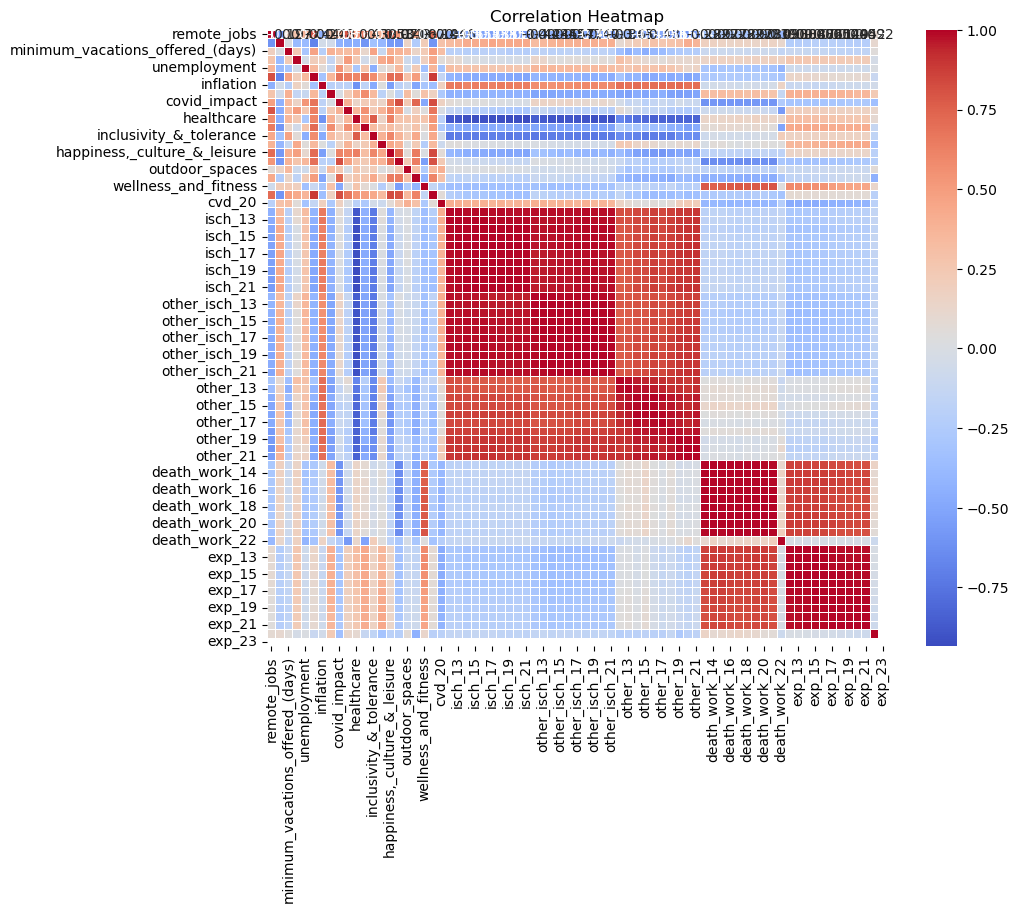

In [659]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Separate numeric and non-numeric columns
numeric_cols = wlb_heart_2.select_dtypes(include=[np.number]).columns
non_numeric_cols = wlb_heart_2.select_dtypes(exclude=[np.number]).columns

#fill null value
wlb_heart_2[numeric_cols] = wlb_heart_2[numeric_cols].fillna(wlb_heart_2[numeric_cols].mean())


# Round all numeric columns to one decimal place
wlb_heart_2 = wlb_heart_2.round(1)


In [660]:
wlb_heart_agg

,country,city,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),...,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,Austria,"[Graz, Vienna]",36.7,12.5,25.0,25.0,84.8,4.4,6.6,275.4,...,5114.9,5302.1,5536.8,5700.3,5880.9,6070.4,6346.3,6472.4,6715.3,17684.0
1,Belgium,[Brussels],42.3,12.9,20.0,24.0,87.8,4.3,6.5,361.2,...,9338.1,10334.4,11289.1,11831.1,12477.1,11964.1,11244.6,11897.6,5532.2,17684.0
2,Denmark,[Copenhagen],41.4,10.5,25.0,28.0,94.8,7.6,5.2,364.0,...,5864.6,6035.7,6195.3,6364.0,6585.1,6703.0,6858.8,7162.5,7492.4,17684.0
3,Finland,[Helsinki],38.9,12.7,25.0,30.0,89.3,6.3,4.8,1.2,...,4129.1,3709.0,3722.3,3661.2,3633.1,3821.6,3961.0,4289.0,5532.2,17684.0
4,France,[Paris],37.7,13.8,25.0,27.0,88.0,5.1,4.2,490.0,...,37663.2,38437.2,39277.3,40406.4,41385.8,42734.5,46351.2,48894.0,5532.2,17684.0
5,Germany,"[Stuttgart, Munich, Leipzig, Hamburg, Frankfur...",36.7,11.6,20.0,26.0,90.6,4.8,6.3,466.9,...,52260.0,55557.0,58733.0,68311.0,73020.0,78264.0,85207.0,89508.0,5532.2,17684.0
6,Hungary,[Budapest],30.9,14.4,20.0,24.1,97.5,1.2,11.2,1.1,...,319.0,312.1,298.4,340.4,355.7,364.7,407.1,439.6,5532.2,17684.0
7,Ireland,[Dublin],38.7,12.7,20.0,21.0,92.6,2.7,5.0,182.0,...,4061.0,4277.6,4527.3,4585.7,4907.8,5212.6,5783.4,6013.6,6403.2,17684.0
8,Italy,[Milan],35.0,13.2,20.0,21.0,91.4,1.4,5.8,336.7,...,15228.0,15190.0,15478.0,16039.0,16298.0,16102.0,16138.0,16611.0,17480.0,17684.0
9,Netherlands,[Amsterdam],41.6,8.6,20.0,24.0,95.4,8.1,8.6,114.8,...,19838.0,18676.0,18885.0,19892.0,20990.0,22982.0,25842.0,26594.0,5532.2,17684.0


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

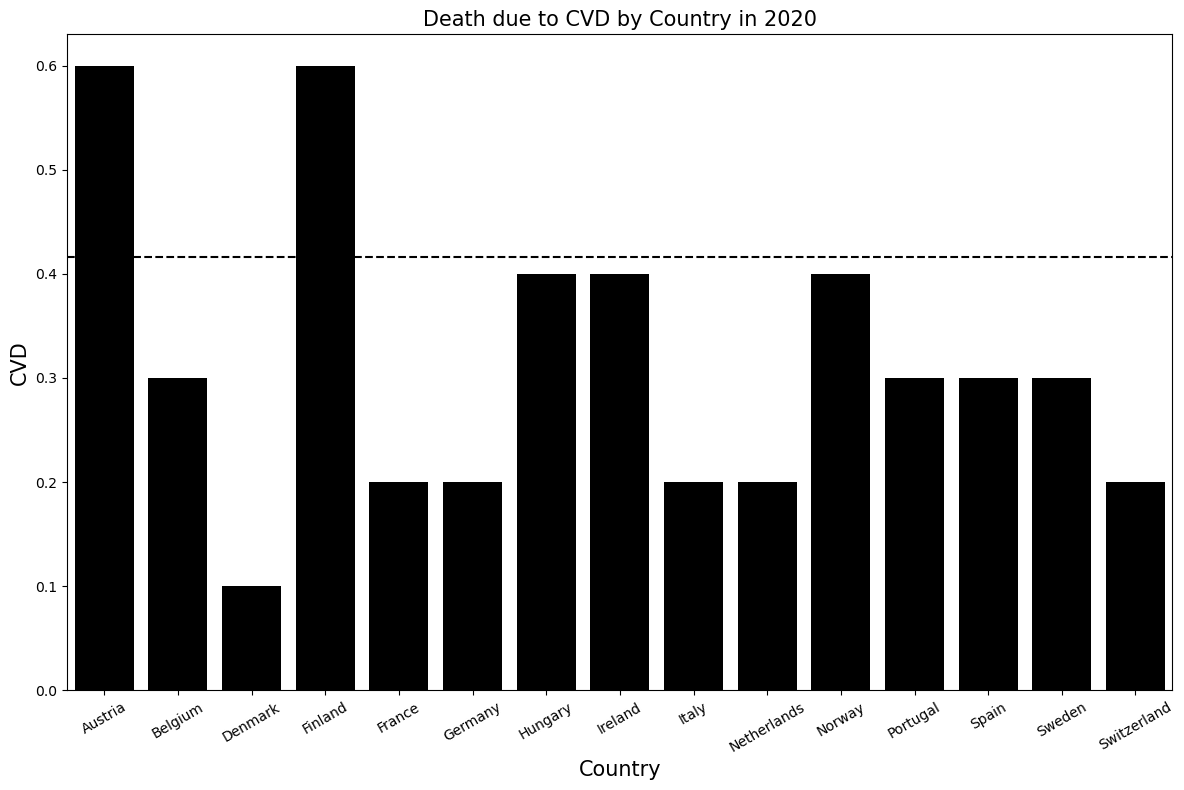

In [661]:
plt.figure(figsize=(12,8))
countries = sns.barplot(data= wlb_heart_agg, x= 'country', y= 'cvd_20', color= 'black')


countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'CVD', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

In [742]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

In [743]:
schema = 'cgn_analytics_24_2' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database



In [577]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'wlb_heart_2'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        wlb_heart_2.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The wlb_heart_2 table was imported successfully.


hypothesis ploting

In [ ]:
palettes = [
    "deep", "muted", "bright", "pastel", "dark", "colorblind",
    "Blues", "BuGn", "GnBu", "OrRd", "PuBu", "YlGn", "YlGnBu",
    "cubehelix", "ch:s=.25,rot=-.25", "light:#5A9", "dark:#5A9",
    "dark:#5A9_r", "Spectral", "coolwarm"
]

# Function to display the color palettes
def display_palette(palette_name, n_colors=10):
    palette = sns.color_palette(palette_name, n_colors)
    sns.palplot(palette)
    plt.title(f"{palette_name} palette with {n_colors} colors")
    plt.show()

# Display all palettes
for palette_name in palettes:
    display_palette(palette_name)


In [662]:
wlb_heart_agg.columns

Index(['country', 'city', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'isch_12', 'isch_13', 'isch_14', 'isch_15', 'isch_16',
       'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21', 'other_isch_12',
       'other_isch_13', 'other_isch_14', 'other_isch_15', 'other_isch_16',
       'other_isch_17', 'other_isch_18', 'other_isch_19', 'other_isch_20',
       'other_isch_21', 'other_12', 'other_13', 'other_14', 'other_15',
       'other_16', 'other_17', 'other_18', 'other_19', 'other_20', 'other_21',
       'death_work_13', 'death_work_14', 'death_work_15

In [682]:
# Reshape the data using melt

#expenses for each country
df_melted = wlb_heart_agg.melt(id_vars=['country'], 
                    value_vars=['exp_20','exp_21', 'exp_22'],
                    var_name='year', 
                    value_name='expenditure')

# Clean the 'year' column
df_melted['year'] = df_melted['year'].str.extract('(\d+)$').astype(int)

print("\nMelted DataFrame:")
print(df_melted)


Melted DataFrame:
        country  year  expenditure
0       Austria    20       6346.3
1       Belgium    20      11244.6
2       Denmark    20       6858.8
3       Finland    20       3961.0
4        France    20      46351.2
5       Germany    20      85207.0
6       Hungary    20        407.1
7       Ireland    20       5783.4
8         Italy    20      16138.0
9   Netherlands    20      25842.0
10       Norway    20      10787.1
11     Portugal    20       1025.4
12        Spain    20      10842.9
13       Sweden    20      14323.0
14  Switzerland    20      16594.5
15      Austria    21       6472.4
16      Belgium    21      11897.6
17      Denmark    21       7162.5
18      Finland    21       4289.0
19       France    21      48894.0
20      Germany    21      89508.0
21      Hungary    21        439.6
22      Ireland    21       6013.6
23        Italy    21      16611.0
24  Netherlands    21      26594.0
25       Norway    21      12048.2
26     Portugal    21       1102.8
2

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

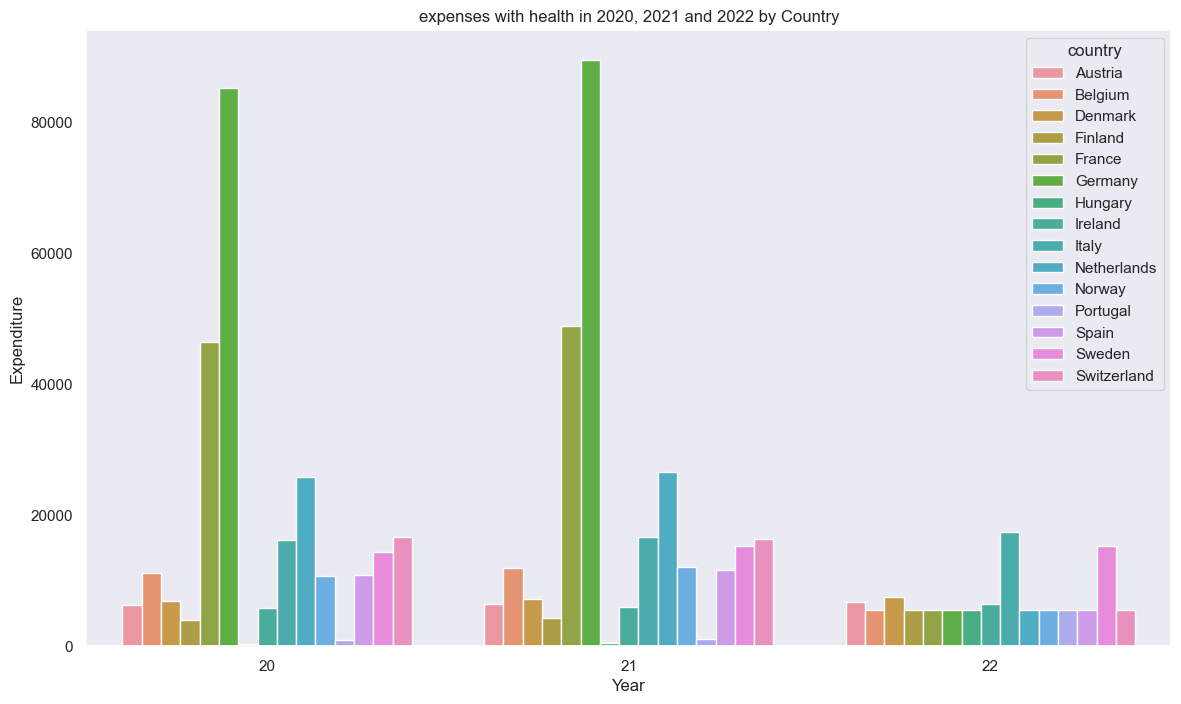

In [692]:
# Set the plot style
sns.set(style="dark")

# Create a line plot for expenditure
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='year', y='expenditure', hue='country')

# Adjust the axis labels and title
plt.title('expenses with health in 2020, 2021 and 2022 by Country')
plt.xlabel('Year')
plt.ylabel('Expenditure')

# Show the plot
plt.show()

In [ ]:
#paid_parental_leave 2021,2022

# Reshape the data using melt
df_melted = wlb_heart_agg.melt(id_vars=['country', 'paid_parental_leave_(days)'], 
                    value_vars=['exp_21', 'exp_22'],
                    var_name='year', 
                    value_name='expenditure')

# Clean the 'year' column
df_melted['year'] = df_melted['year'].str.extract('(\d+)$').astype(int)

print("\nMelted DataFrame:")
print(df_melted)



/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

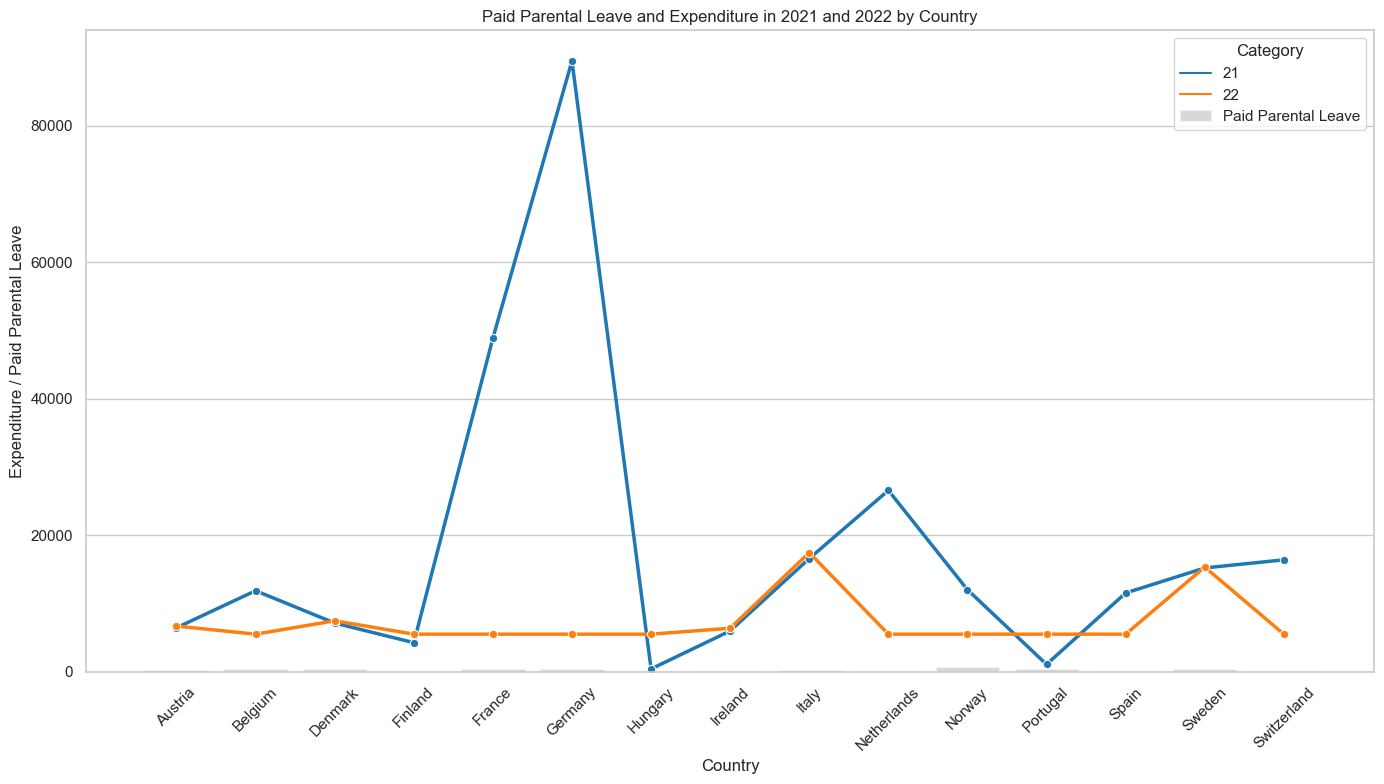

In [711]:
# Plot the data
sns.set(style="whitegrid")

# Create a bar plot for paid parental leave
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='country', y='paid_parental_leave_(days)', alpha=0.3, color='gray', label='Paid Parental Leave')

# Create a line plot for expenditures
sns.lineplot(data=df_melted, x='country', y='expenditure', hue='year', marker='o', linewidth=2.5, palette='tab10')


# Customize the plot
plt.title('Paid Parental Leave and Expenditure in 2021 and 2022 by Country')
plt.xlabel('Country')
plt.ylabel('Expenditure / Paid Parental Leave')
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#paid_parental_leave 2019 and 2020

# Reshape the data using melt
df_melted = wlb_heart_agg.melt(id_vars=['country', 'paid_parental_leave_(days)'], 
                    value_vars=['exp_19', 'exp_20'],
                    var_name='year', 
                    value_name='expenditure')

# Clean the 'year' column
df_melted['year'] = df_melted['year'].str.extract('(\d+)$').astype(int)

print("\nMelted DataFrame:")
print(df_melted)



/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

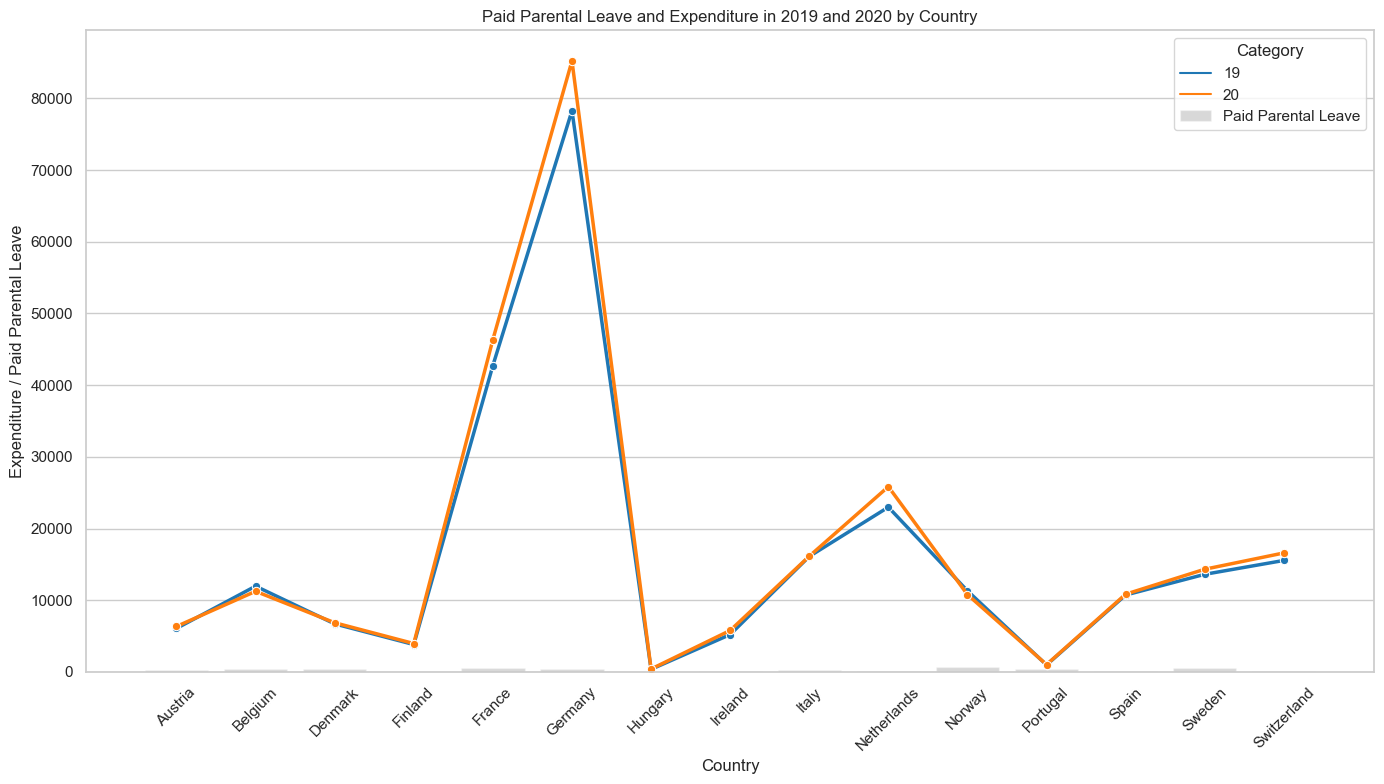

In [713]:
# Plot the data
sns.set(style="whitegrid")

# Create a bar plot for paid parental leave
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='country', y='paid_parental_leave_(days)', alpha=0.3, color='gray', label='Paid Parental Leave')

# Create a line plot for expenditures
sns.lineplot(data=df_melted, x='country', y='expenditure', hue='year', marker='o', linewidth=2.5, palette='tab10')


# Customize the plot
plt.title('Paid Parental Leave and Expenditure in 2019 and 2020 by Country')
plt.xlabel('Country')
plt.ylabel('Expenditure / Paid Parental Leave')
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()

In [714]:
wlb_heart_agg.columns

Index(['country', 'city', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'isch_12', 'isch_13', 'isch_14', 'isch_15', 'isch_16',
       'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21', 'other_isch_12',
       'other_isch_13', 'other_isch_14', 'other_isch_15', 'other_isch_16',
       'other_isch_17', 'other_isch_18', 'other_isch_19', 'other_isch_20',
       'other_isch_21', 'other_12', 'other_13', 'other_14', 'other_15',
       'other_16', 'other_17', 'other_18', 'other_19', 'other_20', 'other_21',
       'death_work_13', 'death_work_14', 'death_work_15

In [724]:
#healthcare 2021,2022

# Reshape the data using melt
df_melted = wlb_heart_agg.melt(id_vars=['country', 'healthcare'], 
                    value_vars=['exp_21', 'exp_22'],
                    var_name='year', 
                    value_name='expenditure')

# Clean the 'year' column
df_melted['year'] = df_melted['year'].str.extract('(\d+)$').astype(int)

print("\nMelted DataFrame:")
print(df_melted)




Melted DataFrame:
        country  healthcare  year  expenditure
0       Austria        93.6    21       6472.4
1       Belgium        94.4    21      11897.6
2       Denmark        94.8    21       7162.5
3       Finland        96.7    21       4289.0
4        France        95.9    21      48894.0
5       Germany        94.5    21      89508.0
6       Hungary        68.5    21        439.6
7       Ireland        86.6    21       6013.6
8         Italy        94.2    21      16611.0
9   Netherlands        95.6    21      26594.0
10       Norway       100.0    21      12048.2
11     Portugal        89.5    21       1102.8
12        Spain        97.4    21      11569.4
13       Sweden        96.0    21      15235.7
14  Switzerland        99.3    21      16419.6
15      Austria        93.6    22       6715.3
16      Belgium        94.4    22       5532.2
17      Denmark        94.8    22       7492.4
18      Finland        96.7    22       5532.2
19       France        95.9    22       5

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


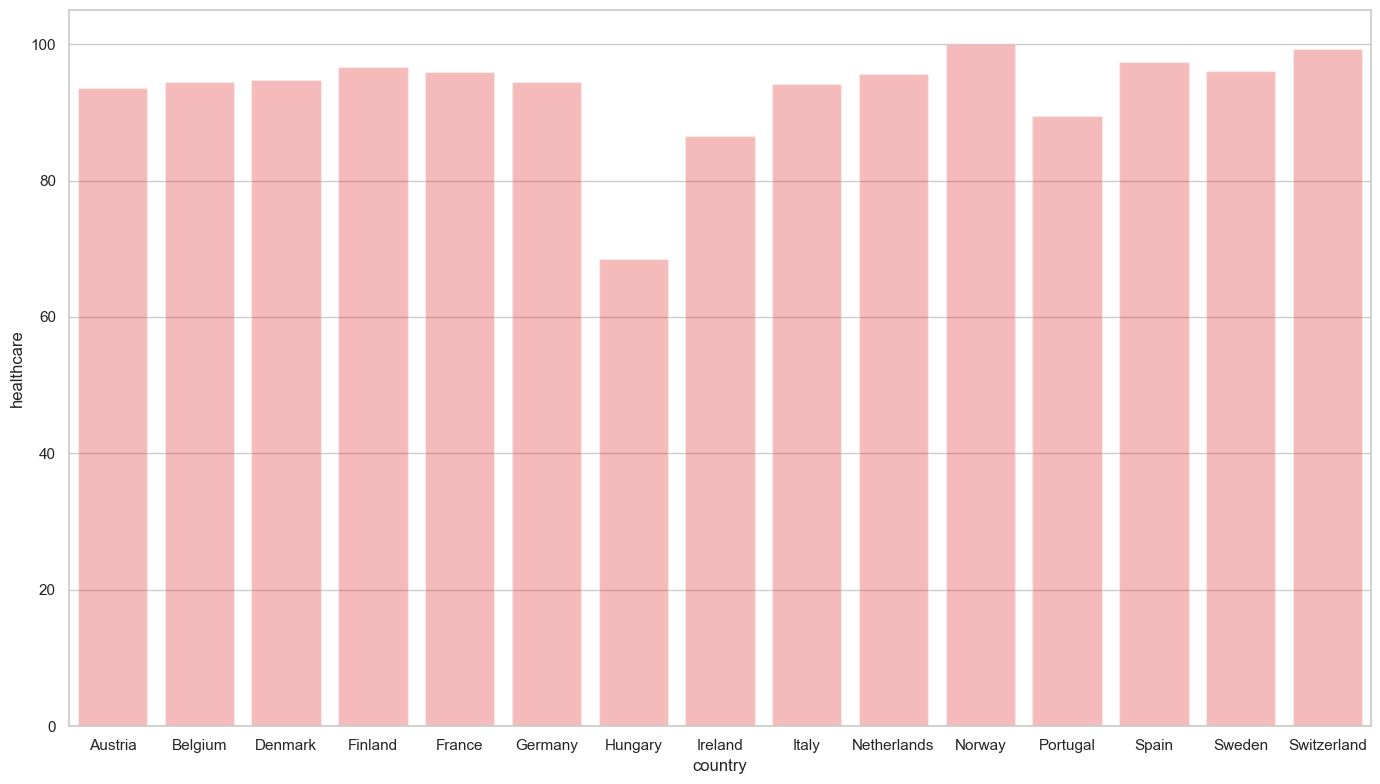

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

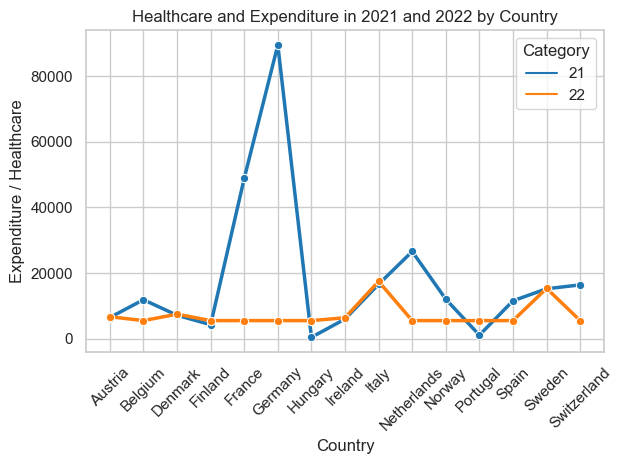

In [725]:
# Plot the data
sns.set(style="whitegrid")

# Create a bar plot for healthcare
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='country', y='healthcare', alpha=0.3, color='red', label='Healthcare')
# Show the plot
plt.tight_layout()
plt.show()

# Create a line plot for expenditures
sns.lineplot(data=df_melted, x='country', y='expenditure', hue='year', marker='o', linewidth=2.5, palette='tab10')

# Customize the plot
plt.title('Healthcare and Expenditure in 2021 and 2022 by Country')
plt.xlabel('Country')
plt.ylabel('Expenditure / Healthcare')
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()




/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

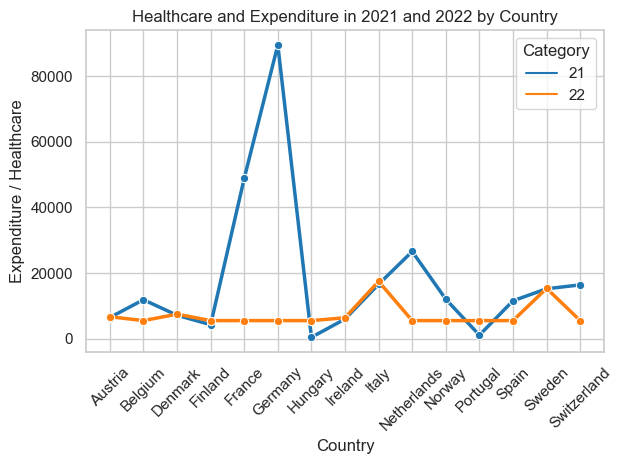

In [723]:
# Create a line plot for expenditures
sns.lineplot(data=df_melted, x='country', y='expenditure', hue='year', marker='o', linewidth=2.5, palette='tab10')

# Customize the plot
plt.title('Healthcare and Expenditure in 2021 and 2022 by Country')
plt.xlabel('Country')
plt.ylabel('Expenditure / Healthcare')
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()


In [727]:
wlb_heart_agg.columns

Index(['country', 'city', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'isch_12', 'isch_13', 'isch_14', 'isch_15', 'isch_16',
       'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21', 'other_isch_12',
       'other_isch_13', 'other_isch_14', 'other_isch_15', 'other_isch_16',
       'other_isch_17', 'other_isch_18', 'other_isch_19', 'other_isch_20',
       'other_isch_21', 'other_12', 'other_13', 'other_14', 'other_15',
       'other_16', 'other_17', 'other_18', 'other_19', 'other_20', 'other_21',
       'death_work_13', 'death_work_14', 'death_work_15

In [731]:
#alternativ for pivot table 

df_melted_isch = wlb_heart_agg.melt(id_vars=['country'], 
                    value_vars=['isch_13', 'isch_14', 'isch_15', 'isch_16', 'isch_17', 'isch_18','isch_19','isch_20','isch_21'],
                    var_name='Year', 
                    value_name='Ischemic_Deaths')

# Clean the 'Year' column
df_melted_isch['Year'] = df_melted_isch['Year'].str.extract('(\d+)$').astype(int)

# Save the reshaped data to a new CSV file
df_melted_isch.to_csv('reshaped_ischemic_data.csv', index=False)
print(df_melted_isch)


         country  Year  Ischemic_Deaths
0        Austria    13             38.3
1        Belgium    13             25.3
2        Denmark    13             22.1
3        Finland    13             42.7
4         France    13             18.2
..           ...   ...              ...
130       Norway    21             18.7
131     Portugal    21             27.7
132        Spain    21             22.9
133       Sweden    21             22.7
134  Switzerland    21             15.8

[135 rows x 3 columns]


In [736]:
df_melted_other_isch = wlb_heart_agg.melt(id_vars=['country'], 
                    value_vars=['other_isch_13', 'other_isch_14', 'other_isch_15', 'other_isch_16', 'other_isch_17', 'other_isch_18','other_isch_19','other_isch_20','other_isch_21'],
                    var_name='Year', 
                    value_name='other_ischemic_Deaths')

# Clean the 'Year' column
df_melted_other_isch['Year'] = df_melted_other_isch['Year'].str.extract('(\d+)$').astype(int)

# Save the reshaped data to a new CSV file
df_melted_other_isch.to_csv('reshaped_ischemic_data.csv', index=False)
print(df_melted_other_isch)


         country  Year  other_ischemic_Deaths
0        Austria    13                   12.2
1        Belgium    13                    6.4
2        Denmark    13                   10.4
3        Finland    13                   26.8
4         France    13                    6.0
..           ...   ...                    ...
130       Norway    21                    8.0
131     Portugal    21                    9.5
132        Spain    21                   10.0
133       Sweden    21                   10.0
134  Switzerland    21                    6.2

[135 rows x 3 columns]


In [738]:
df_melted_others = wlb_heart_agg.melt(id_vars=['country'], 
                    value_vars=['other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18','other_19','other_20','other_21'],
                    var_name='Year', 
                    value_name='other_Deaths')

# Clean the 'Year' column
df_melted_others['Year'] = df_melted_others['Year'].str.extract('(\d+)$').astype(int)

# Save the reshaped data to a new CSV file
df_melted_others.to_csv('reshaped_ischemic_data.csv', index=False)
print(df_melted_other_isch)

         country  Year  other_ischemic_Deaths
0        Austria    13                   12.2
1        Belgium    13                    6.4
2        Denmark    13                   10.4
3        Finland    13                   26.8
4         France    13                    6.0
..           ...   ...                    ...
130       Norway    21                    8.0
131     Portugal    21                    9.5
132        Spain    21                   10.0
133       Sweden    21                   10.0
134  Switzerland    21                    6.2

[135 rows x 3 columns]


In [740]:
df_melted_work = wlb_heart_agg.melt(id_vars=['country'], 
                    value_vars=['death_work_13', 'death_work_14', 'death_work_15', 'death_work_16', 'death_work_17', 'death_work_18','death_work_19','death_work_20','death_work_21'],
                    var_name='Year', 
                    value_name='death_work')

# Clean the 'Year' column
df_melted_work['Year'] = df_melted_work['Year'].str.extract('(\d+)$').astype(int)

# Save the reshaped data to a new CSV file
df_melted_work.to_csv('reshaped_ischemic_data.csv', index=False)
print(df_melted_work)

         country  Year  death_work
0        Austria    13       226.0
1        Belgium    13       312.0
2        Denmark    13        93.0
3        Finland    13       183.0
4         France    13      1714.0
..           ...   ...         ...
130       Norway    21       102.0
131     Portugal    21       189.0
132        Spain    21       697.0
133       Sweden    21       241.0
134  Switzerland    21       156.0

[135 rows x 3 columns]


In [744]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'df_melted_work'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_melted_work.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The df_melted_work table was imported successfully.
